In [1]:
import numpy as np
from ler.utils import get_param_from_json, save_json, load_json
import matplotlib.pyplot as plt
import pobs

Setting multiprocessing start method to 'fork'


## Astrophysical parameter distributions

## Lensed events

* $P_{astro}(m_{1}, m_{2}, \alpha, \delta, \iota, \chi_{eff}, d_{L,1}, d_{L,2}, \Delta T_2|H_L)$

In [2]:
# get data for detectable events
lensed_param = get_param_from_json('/Users/phurailatpamhemantakumar/phd/mypackages/pobs/data/ler_data/n_lensed_detectable_bbh_po_spin.json')

# delete the unnecessary keys
list_ = ['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'phase', 'psi', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'L1', 'H1', 'V1']
for key in list_:
    del lensed_param[key]
lensed_param.keys()

dict_keys(['ra', 'dec', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'mass_1', 'mass_2', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net'])

In [3]:
# seperate out image 1, 2
# this is wrt to time of arrival
lensed_param_1 = {}
lensed_param_2 = {}

for key, value in lensed_param.items():
    if np.shape(np.shape(value))[0]==2:
        lensed_param_1[key] = value[:,0]
        lensed_param_2[key] = value[:,1]
    else:
        lensed_param_1[key] = value
        lensed_param_2[key] = value

# For image 1 and 2 only
# only keep snr > 8
idx_snr1 = lensed_param_1['optimal_snr_net'] > 8
idx_snr2 = lensed_param_2['optimal_snr_net'] > 8
idx_snr = idx_snr1 & idx_snr2

# with effective spin
# Note: chi_eff for image 1 and 2 is the same
chi_eff = (lensed_param_1['a_1']*np.cos(lensed_param_1['tilt_1']) + lensed_param_1['a_2']*np.cos(lensed_param_1['tilt_2']))/(lensed_param_1['mass_1'] + lensed_param_1['mass_2'])

# log10 for (time/86400) and luminosity distance
data_dict = dict(
    mass_1 = lensed_param_1['mass_1'][idx_snr],
    mass_2 = lensed_param_1['mass_2'][idx_snr],
    ra = lensed_param_1['ra'][idx_snr],
    sindec = np.cos(np.pi/2. - lensed_param_1['dec'][idx_snr]),
    costheta_jn = np.cos(lensed_param_1['theta_jn'][idx_snr]),
    chi_eff = chi_eff[idx_snr],
    log10_dl_1 = np.log10(lensed_param_1['effective_luminosity_distance'][idx_snr]),
    log10_dl_2 = np.log10(lensed_param_2['effective_luminosity_distance'][idx_snr]),
    log10_dt_12_days = np.log10(((lensed_param_2['effective_geocent_time'][idx_snr] - lensed_param_1['effective_geocent_time'][idx_snr])/86400.)),
)

* $P_{astro}(m_{1}, m_{2}, \alpha, \delta, \iota, \chi_{eff}, d_{L,1}, d_{L,2}, \Delta T_2|H_L)$

In [4]:
# reload the module
# import importlib
# importlib.reload(pobs)

test = pobs.ModelGenerator(
    model_name='astro_lensed', 
    data_dict=data_dict,
    create_new=True,
)

# test.create_model() # uncomment to create the model if create_new=False

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = {}
path_dict_all['astro_lensed'] = test.path_dict 
save_json(path_, path_dict_all)

In [5]:
# this is the case when you have already created the model
# test2 = pobs.ModelGenerator(
#     model_name='astro_lensed', 
#     data_dict=data_dict,
#     path_dict=test.path_dict,
#     create_new=False,
# )

In [5]:
# # get pdf
# random_data_dict = test.random(size=10000)
# pdf_data_dict = test.pdf(data_dict=random_data_dict)
# print(pdf_data_dict)

[2.68439828e-058 5.96426168e-146 0.00000000e+000 ... 1.94092212e-245
 7.65259082e-104 0.00000000e+000]


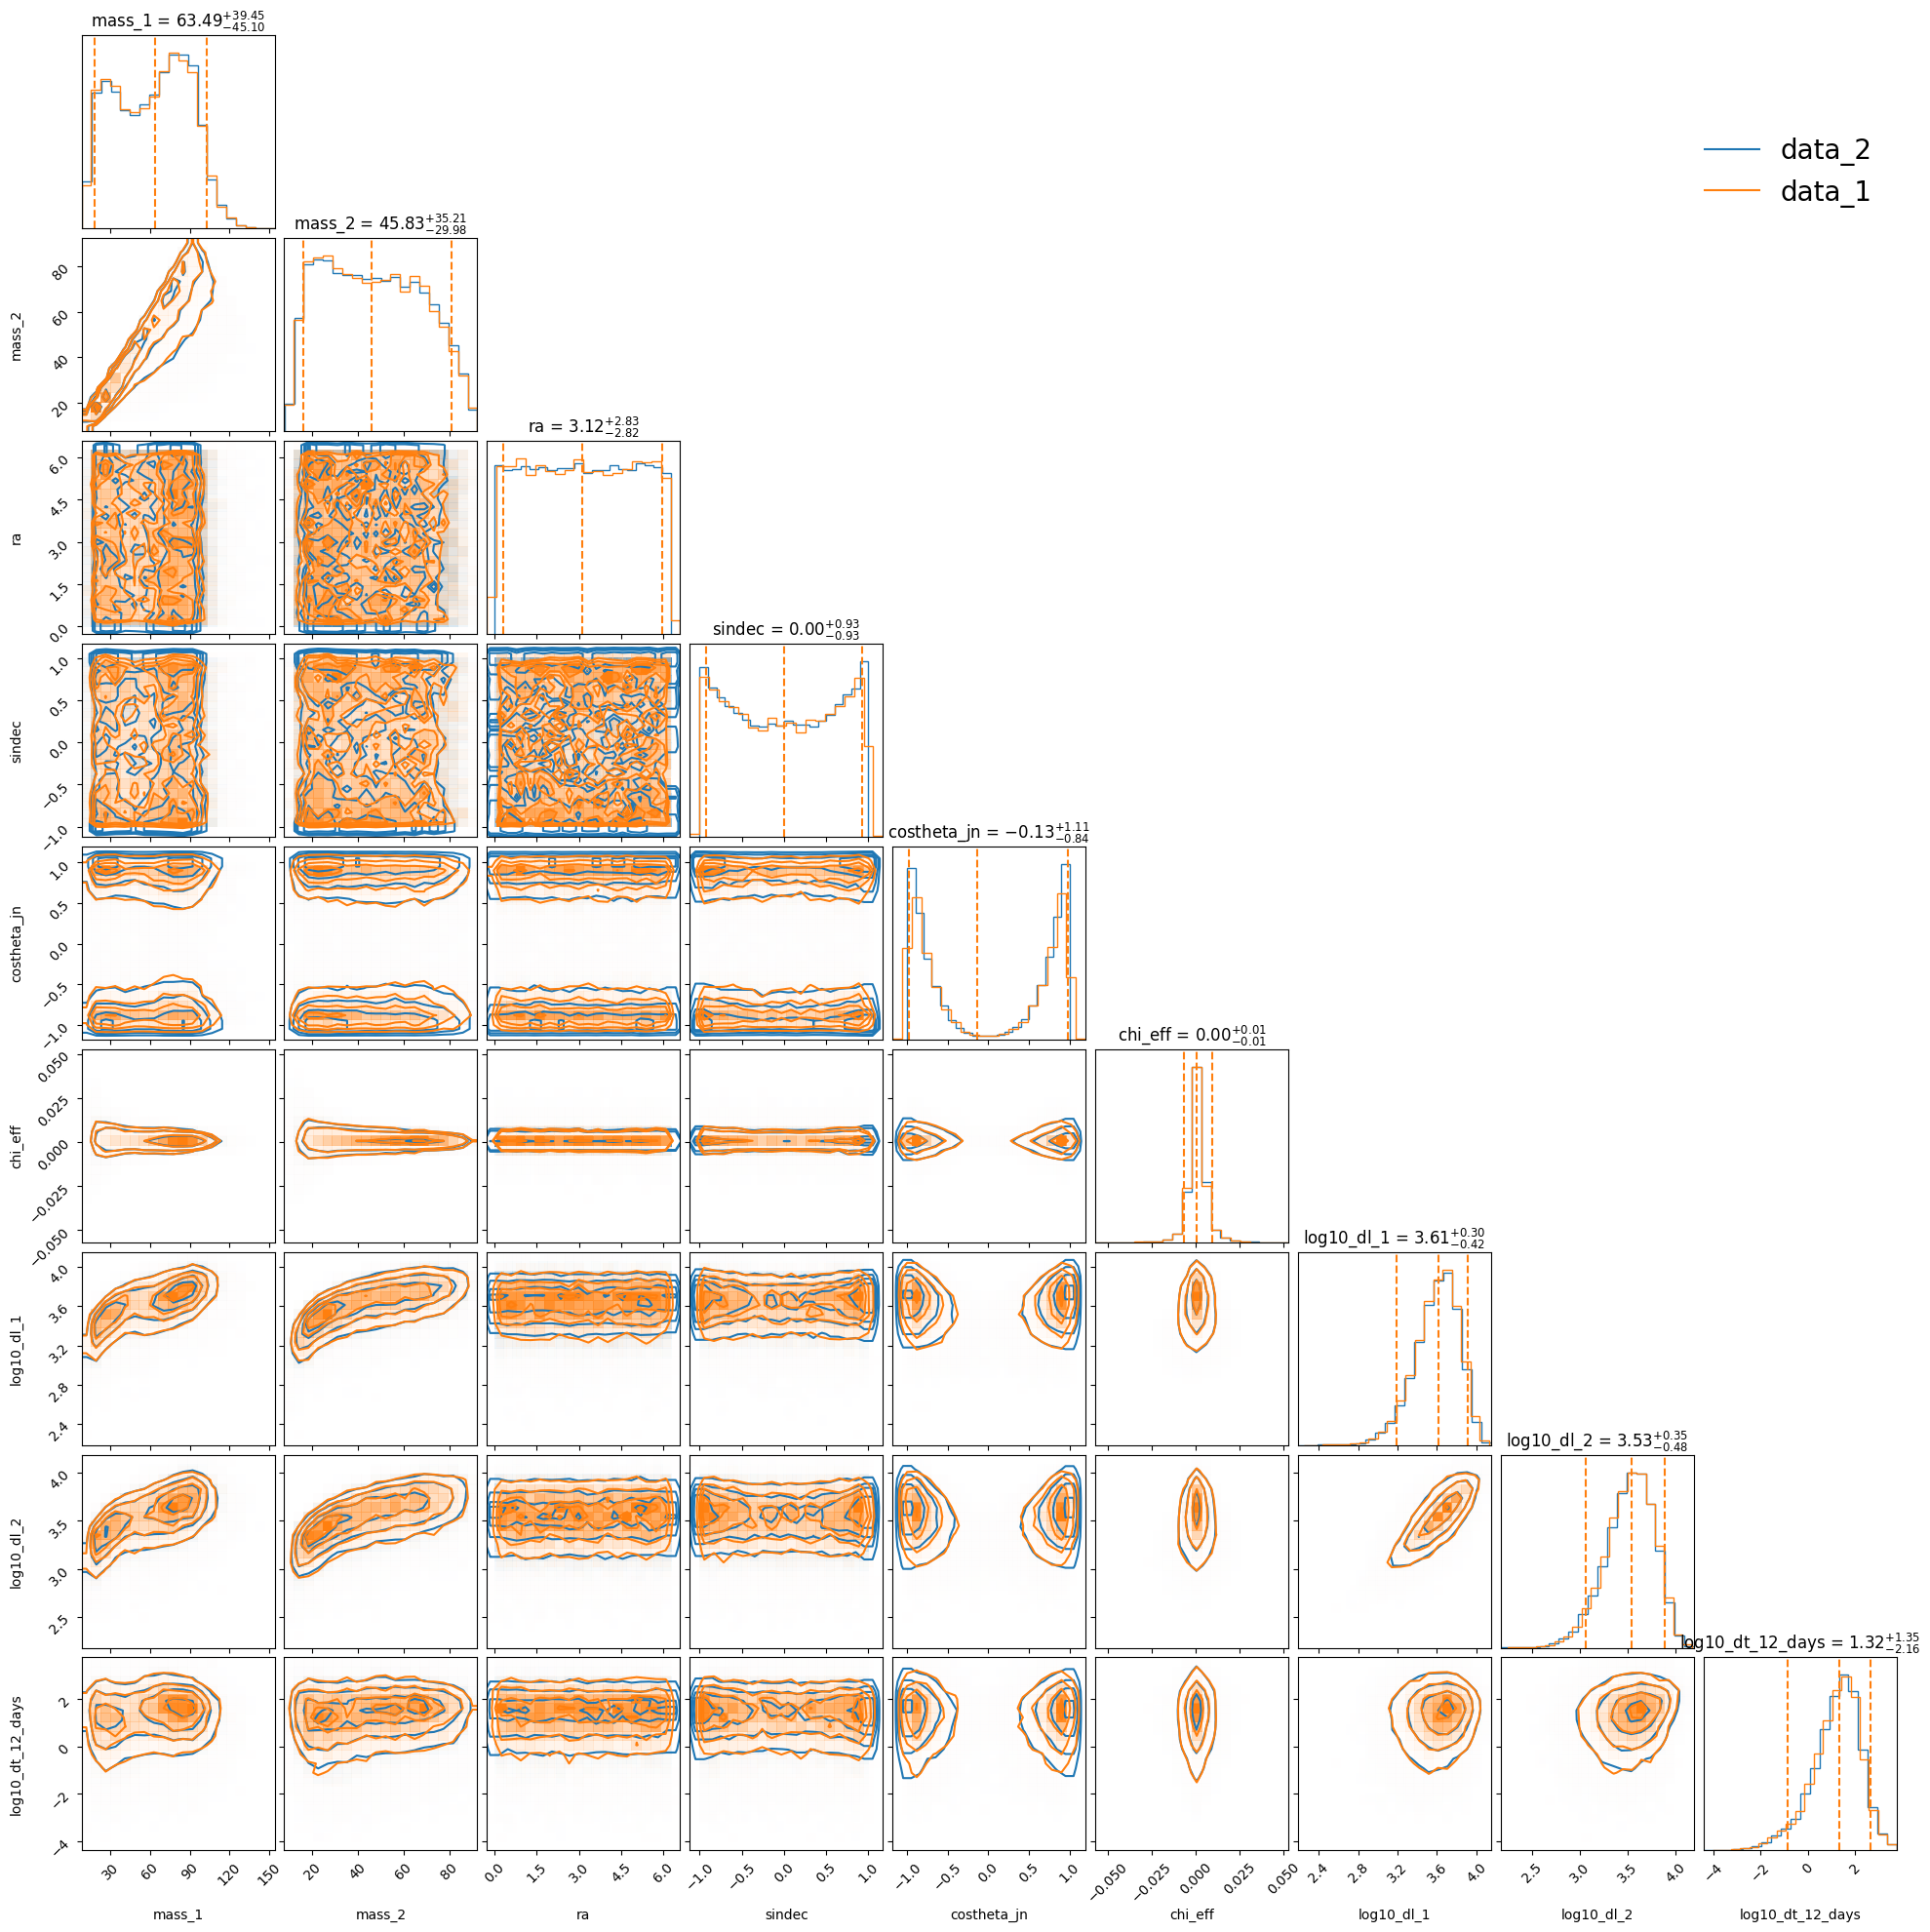

In [6]:
# plot corner
new_data_dict = test.resample(size=20000)
test.plot(data_dict1=new_data_dict, data_dict2=data_dict)
plt.show()

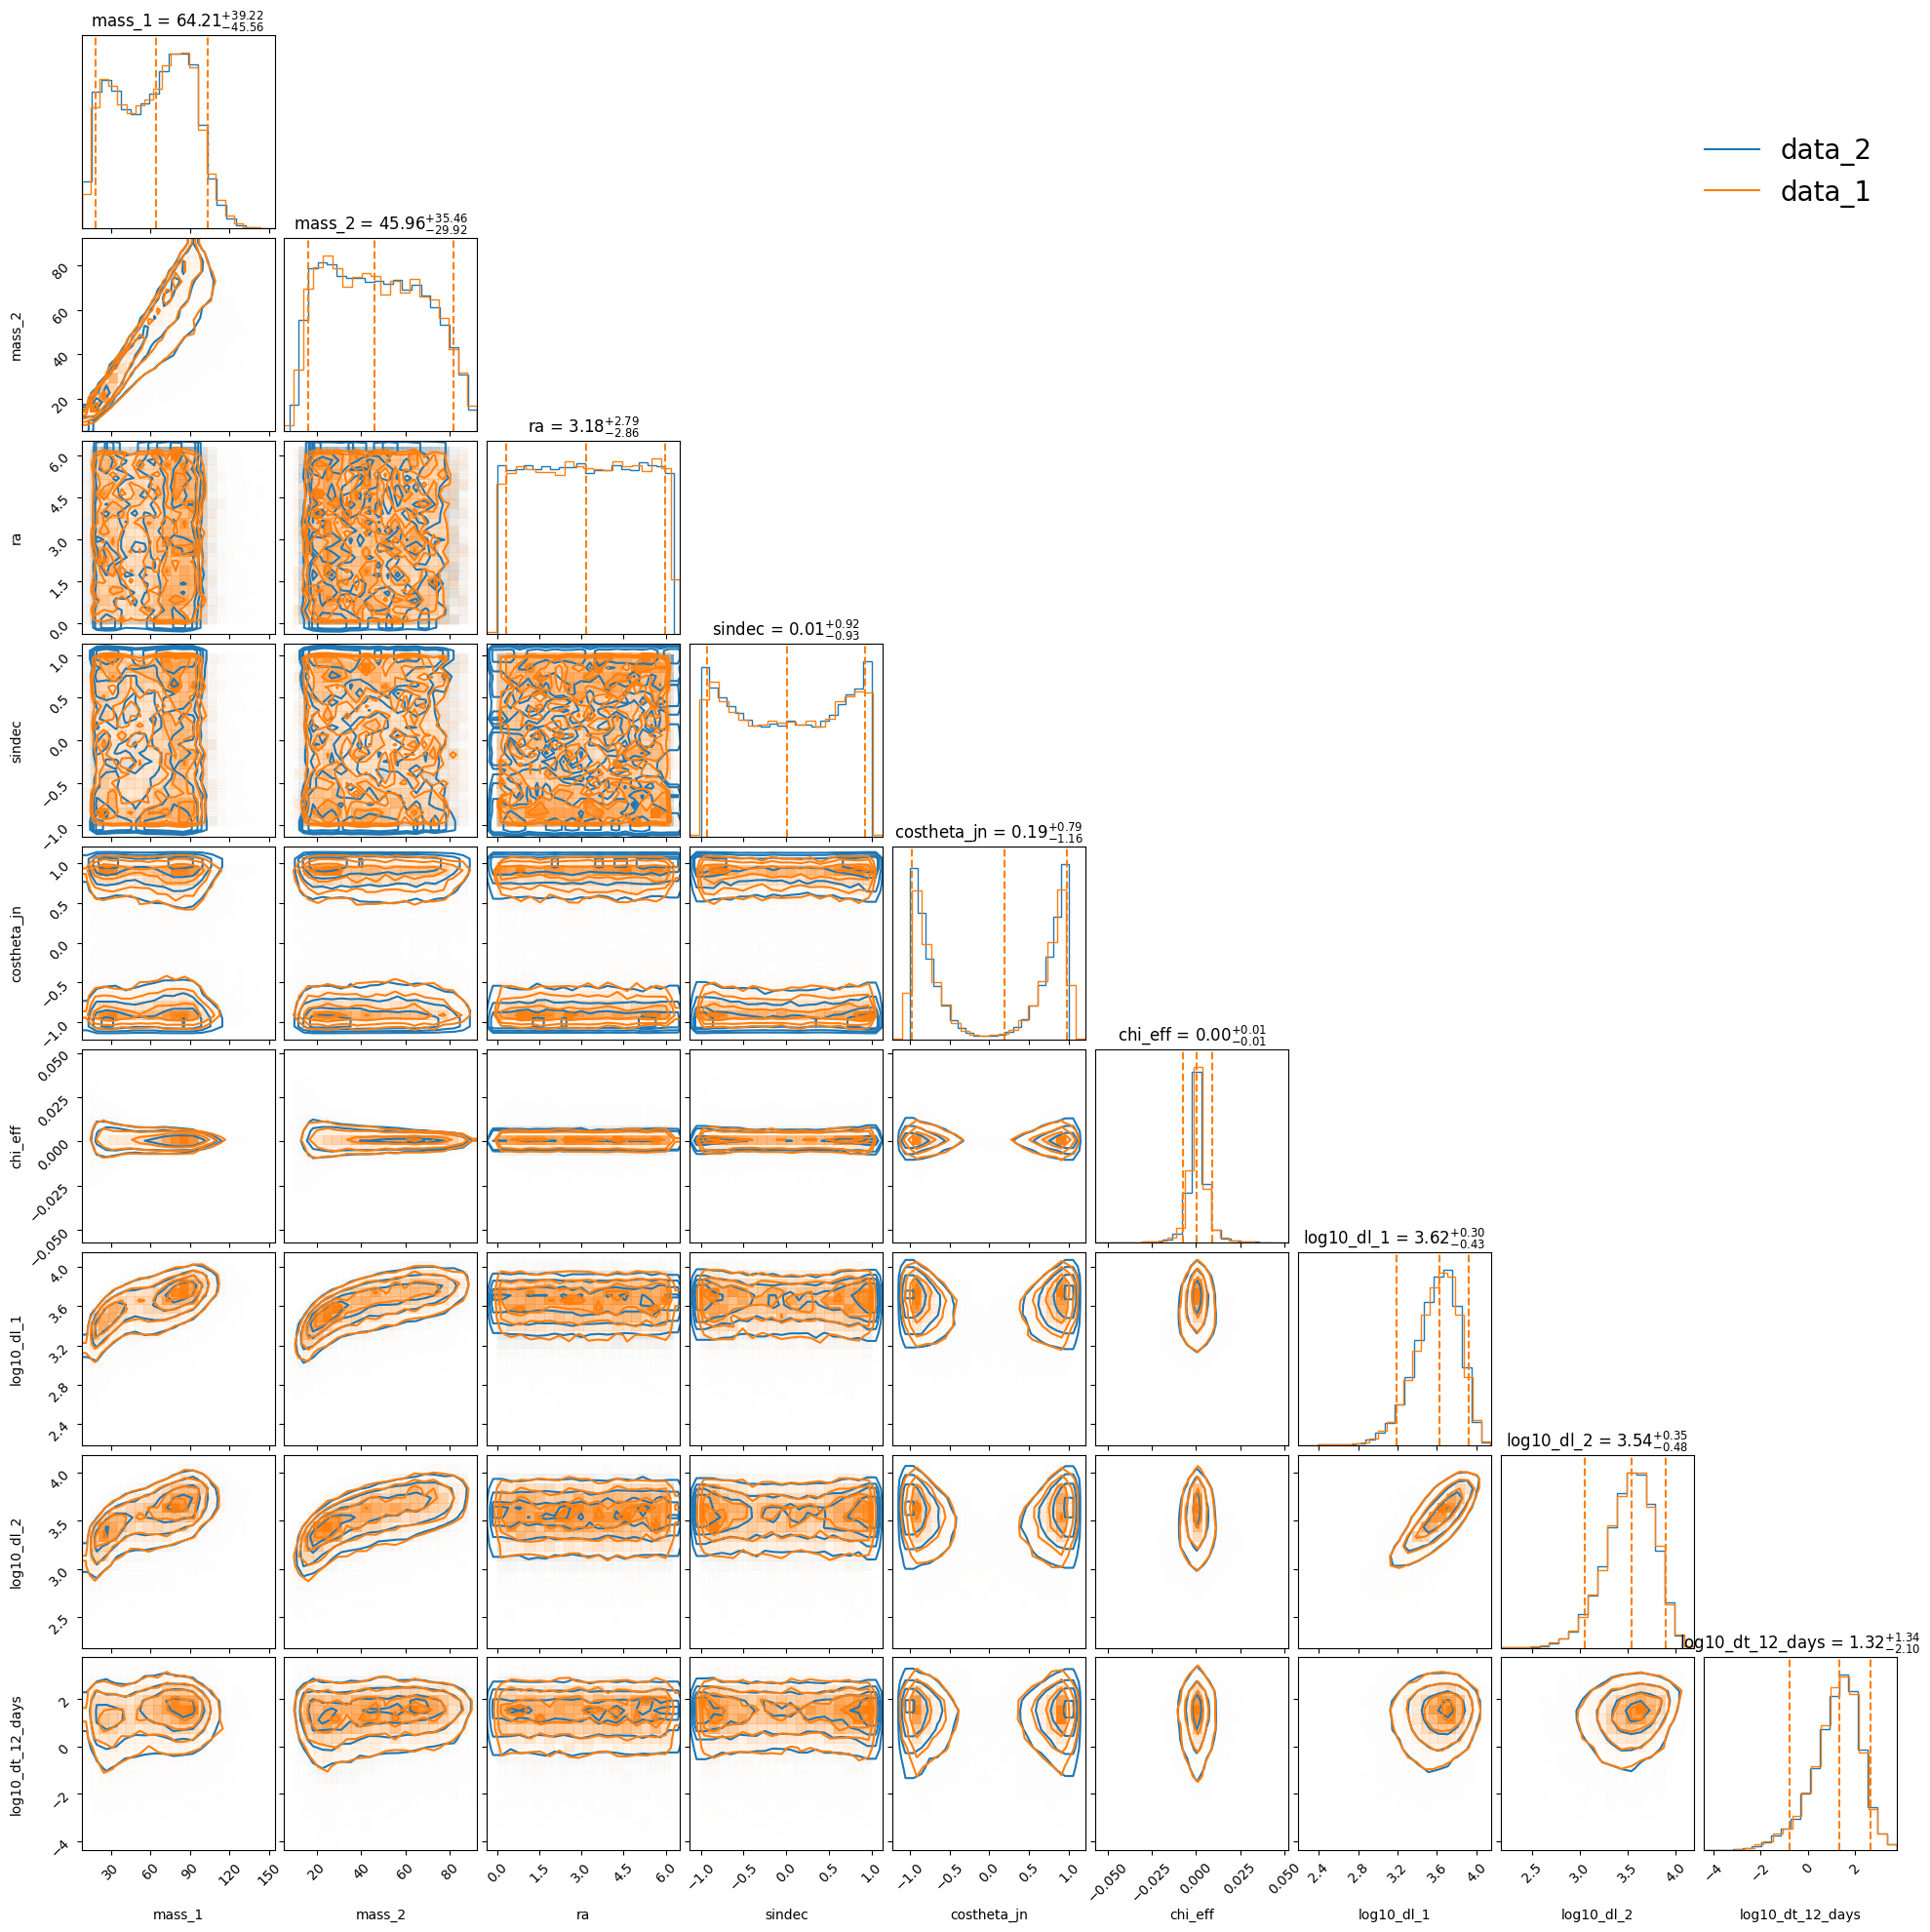

In [6]:
# plot corner
new_data_dict = test.resample(size=20000)
test.plot(data_dict1=new_data_dict, data_dict2=data_dict)
plt.show()

## Unlensed events

* $P_{astro}(m_{1,1}, m_{2,1}, \alpha_1, \delta_1, \iota_1, \chi_{eff,1}, d_{L,1}|H_U)$

* $P_{astro}(m_{1,2}, m_{2,2}, d_{L,2}, \iota_2, \chi_{eff,2}, d_{L,2}, \Delta T_2|H_U)$

In [181]:
# get data for detectable events
unlensed_param = get_param_from_json('../data/ler_data/n_unlensed_detectable_bbh_po_spin.json')
unlensed_param.keys()

list_ = ['zs', 'phase', 'psi', 'phi_12', 'phi_jl', 'mass_1_source', 'mass_2_source', 'L1', 'H1', 'V1', 'optimal_snr_net']

# delete the unnecessary keys
for key in list_:
    del unlensed_param[key]

# chi_eff
chi_eff = (unlensed_param['a_1']*np.cos(unlensed_param['tilt_1']) + unlensed_param['a_2']*np.cos(unlensed_param['tilt_2']))/(unlensed_param['mass_1'] + unlensed_param['mass_2'])
unlensed_param['chi_eff'] = chi_eff
del unlensed_param['a_1'], unlensed_param['a_2'], unlensed_param['tilt_1'], unlensed_param['tilt_2']

In [182]:
# we will create two sets of unlensed parameters
size = 25000
idx = np.random.choice(np.arange(0,2*size), 2*size, replace=False)
idx1 = idx[:size]
idx2 = idx[size:]

# let's make sure that 2nd set comes after the first set in time
geocent_time1 = unlensed_param['geocent_time'][idx1]
geocent_time2 = unlensed_param['geocent_time'][idx2]
mask = geocent_time2 < geocent_time1
# swap the values
# geocent_time1[mask], geocent_time2[mask] = geocent_time2[mask], geocent_time1[mask]
new_dict1 = dict()
new_dict2 = dict()
for key, value in unlensed_param.items():
    new_dict1[key] = value[idx1]
    new_dict2[key] = value[idx2]
    # swap the values
    new_dict1[key][mask], new_dict2[key][mask] = new_dict2[key][mask], new_dict1[key][mask]

In [184]:
# log10 for (time/86400) and luminosity distance
data_dict = dict(
    mass_1 = new_dict1['mass_1'],
    mass_2 = new_dict1['mass_2'],
    ra = new_dict1['ra'],
    sindec = np.cos(np.pi/2. - new_dict1['dec']),
    costheta_jn = np.cos(new_dict1['theta_jn']),
    chi_eff = new_dict1['chi_eff'],
    log10_dl = np.log10(new_dict1['luminosity_distance']),
)

test = mg.ModelGenerator(
    model_name='astro_unlensed1', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['astro_unlensed1'] = test.path_dict
save_json(path_, path_dict_all)

In [185]:
data_dict = dict(
    mass_1 = new_dict2['mass_1'],
    mass_2 = new_dict2['mass_2'],
    ra = new_dict2['ra'],
    sindec = np.cos(np.pi/2. - new_dict2['dec']),
    costheta_jn = np.cos(new_dict2['theta_jn']),
    chi_eff = new_dict2['chi_eff'],
    log10_dl = np.log10(new_dict2['luminosity_distance']),
    log10_dt_days = np.log10((new_dict2['geocent_time'] - new_dict1['geocent_time'])/86400.),
)

test = mg.ModelGenerator(
    model_name='astro_unlensed1', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['astro_unlensed2'] = test.path_dict
save_json(path_, path_dict_all)

In [102]:
# # get pdf
# random_data_dict = test.random(size=10000)
# pdf_data_dict = test.pdf(data_dict=random_data_dict)

# # plot corner
# new_data_dict = test.resample(size=20000)
# test.plot(data_dict1=new_data_dict, data_dict2=data_dict)
# plt.show()

## Posterior distribution

In [186]:
import pandas as pd

l1_ps_1=pd.read_csv('../data/test_data/2_5816_896868863.052364587-1.dat',delimiter='\t')
l1_ps_2=pd.read_csv('../data/test_data/2_5816_896868759.838516950-2.dat',delimiter='\t')


l2_ps_1=pd.read_csv('../data/test_data/2_5864_623721325.912931442-1.dat',delimiter='\t')
l2_ps_2=pd.read_csv('../data/test_data/2_5864_623706766.881841421-2.dat',delimiter='\t')


ul1_ps=pd.read_csv('../data/test_data/502002000.000000000-4004.dat',delimiter='\t')
ul2_ps=pd.read_csv('../data/test_data/502167000.000000000-4334.dat',delimiter='\t')

### Dataset 1

* $P(m_{1,1}, m_{2,1},\alpha_1, \delta_1, \iota_1, \chi_{eff,1}, d_{L,1}|T_1,d_1)$ or $P(.|T_1,d_1)$

In [187]:
# l1_ps_1
data_dict = dict(
    mass_1 = l1_ps_1['m1'],
    mass_2 = l1_ps_1['m2'],
    ra = l1_ps_1['ra'],
    sindec = np.cos(np.pi/2. - l1_ps_1['dec']),
    costheta_jn = np.cos(l1_ps_1['theta_jn']),
    chi_eff = l1_ps_1['chi_eff'],
    log10_dl = np.log10(l1_ps_1['distance']),
)

test = mg.ModelGenerator(
    model_name='posterior_l1_ps_1', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_l1_ps_1'] = test.path_dict
save_json(path_, path_dict_all)

In [188]:
# l2_ps_1
data_dict = dict(
    mass_1 = l2_ps_1['m1'],
    mass_2 = l2_ps_1['m2'],
    ra = l2_ps_1['ra'],
    sindec = np.cos(np.pi/2. - l2_ps_1['dec']),
    costheta_jn = np.cos(l2_ps_1['theta_jn']),
    chi_eff = l2_ps_1['chi_eff'],
    log10_dl = np.log10(l2_ps_1['distance']),
) 

test = mg.ModelGenerator(
    model_name='posterior_l2_ps_1', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_l2_ps_1'] = test.path_dict
save_json(path_, path_dict_all)

In [189]:
# ul1_ps
data_dict = dict(
    mass_1 = ul1_ps['m1'],
    mass_2 = ul1_ps['m2'],
    ra = ul1_ps['ra'],
    sindec = np.cos(np.pi/2. - ul1_ps['dec']),
    costheta_jn = np.cos(ul1_ps['theta_jn']),
    chi_eff = ul1_ps['chi_eff'],
    log10_dl = np.log10(ul1_ps['dist']),
)

test = mg.ModelGenerator(
    model_name='posterior_ul1_ps', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_ul1_ps'] = test.path_dict
save_json(path_, path_dict_all)

### Dataset 2

* $P(m_{1,2}, m_{2,2},\alpha_2, \delta_2, \iota_2, \chi_{eff,2}, d_{L,2}|T_2, d_2)$

In [190]:
# l1_ps_2
data_dict = dict(
    mass_1 = l1_ps_2['m1'],
    mass_2 = l1_ps_2['m2'],
    ra = l1_ps_2['ra'],
    sindec = np.cos(np.pi/2. - l1_ps_2['dec']),
    costheta_jn = np.cos(l1_ps_2['theta_jn']),
    chi_eff = l1_ps_2['chi_eff'],
    log10_dl = np.log10(l1_ps_2['distance']),
)

test = mg.ModelGenerator(
    model_name='posterior_l1_ps_2', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_l1_ps_2'] = test.path_dict
save_json(path_, path_dict_all)

In [191]:
# l2_ps_2
data_dict = dict(
    mass_1 = l2_ps_2['m1'],
    mass_2 = l2_ps_2['m2'],
    ra = l2_ps_2['ra'],
    sindec = np.cos(np.pi/2. - l2_ps_2['dec']),
    costheta_jn = np.cos(l2_ps_2['theta_jn']),
    chi_eff = l2_ps_2['chi_eff'],
    log10_dl = np.log10(l2_ps_2['distance']),
)

test = mg.ModelGenerator(
    model_name='posterior_l2_ps_2', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_l2_ps_2'] = test.path_dict
save_json(path_, path_dict_all)

In [192]:
# ul2_ps
data_dict = dict(
    mass_1 = ul2_ps['m1'],
    mass_2 = ul2_ps['m2'],
    ra = ul2_ps['ra'],
    sindec = np.cos(np.pi/2. - ul2_ps['dec']),
    costheta_jn = np.cos(ul2_ps['theta_jn']),
    chi_eff = ul2_ps['chi_eff'],
    log10_dl = np.log10(ul2_ps['dist']),
)

test = mg.ModelGenerator(
    model_name='posterior_ul2_ps', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_ul2_ps'] = test.path_dict
save_json(path_, path_dict_all)

### Combine Dataset

* $P_{comb}(m_{1}, m_{2}, \alpha, \delta, \iota, \chi_{eff}, d_{L,1}, d_{L,2}|d_1, d_2)$

In [193]:
# l1_ps_1, l1_ps_2
# check l1_ps_2 or l1_ps_1 have more data points
len_ = len(l1_ps_2['m1'])
if len(l1_ps_1['m1']) < len_:
    len_ = len(l1_ps_1['m1'])
len_ = int(len_/2)-1

data_dict = dict(
    mass_1 = np.concatenate((l1_ps_1['m1'][0:len_], l1_ps_2['m1'][0:len_])),
    mass_2 = np.concatenate((l1_ps_1['m2'][0:len_], l1_ps_2['m2'][0:len_])),
    ra = np.concatenate((l1_ps_1['ra'][0:len_], l1_ps_2['ra'][0:len_])),
    sindec = np.cos(np.pi/2. - np.concatenate((l1_ps_1['dec'][0:len_], l1_ps_2['dec'][0:len_]))),
    costheta_jn = np.cos(np.concatenate((l1_ps_1['theta_jn'][0:len_], l1_ps_2['theta_jn'][0:len_]))),
    chi_eff = np.concatenate((l1_ps_1['chi_eff'][0:len_], l1_ps_2['chi_eff'][0:len_])),
    log10_dl_1 = np.log10(l1_ps_1['distance'][0:(2*len_)]),
    log10_dl_2 = np.log10(l1_ps_2['distance'][0:(2*len_)]),
)

if not np.median(l1_ps_1['time'][0:2*len_])-np.median(l1_ps_2['time'][0:2*len_])>0:
    data_dict['log10_dl_1'], data_dict['log10_dl_2'] = data_dict['log10_dl_2'], data_dict['log10_dl_1']

test = mg.ModelGenerator(
    model_name='posterior_l1_ps_1_2', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_l1_ps_1_2'] = test.path_dict
save_json(path_, path_dict_all)

In [194]:
# l2_ps_1, l2_ps_2
# check l2_ps_2 or l2_ps_1 have more data points
len_ = len(l2_ps_2['m1'])
if len(l2_ps_1['m1']) < len_:
    len_ = len(l2_ps_1['m1'])
len_ = int(len_/2)-1

data_dict = dict(
    mass_1 = np.concatenate((l2_ps_1['m1'][0:len_], l2_ps_2['m1'][0:len_])),
    mass_2 = np.concatenate((l2_ps_1['m2'][0:len_], l2_ps_2['m2'][0:len_])),
    ra = np.concatenate((l2_ps_1['ra'][0:len_], l2_ps_2['ra'][0:len_])),
    sindec = np.cos(np.pi/2. - np.concatenate((l2_ps_1['dec'][0:len_], l2_ps_2['dec'][0:len_]))),
    costheta_jn = np.cos(np.concatenate((l2_ps_1['theta_jn'][0:len_], l2_ps_2['theta_jn'][0:len_]))),
    chi_eff = np.concatenate((l2_ps_1['chi_eff'][0:len_], l2_ps_2['chi_eff'][0:len_])),
    log10_dl_1 = np.log10(l2_ps_1['distance'][0:(2*len_)]),
    log10_dl_2 = np.log10(l2_ps_2['distance'][0:(2*len_)]),
)

if not np.median(l2_ps_1['time'][0:2*len_])-np.median(l2_ps_2['time'][0:2*len_])>0:
    data_dict['log10_dl_1'], data_dict['log10_dl_2'] = data_dict['log10_dl_2'], data_dict['log10_dl_1']

test = mg.ModelGenerator(
    model_name='posterior_l2_ps_1_2', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_l2_ps_1_2'] = test.path_dict
save_json(path_, path_dict_all)

In [195]:
# ul1_ps, ul2_ps
# check ul2_ps or ul1_ps have more data points
len_ = len(ul2_ps['m1'])
if len(ul1_ps['m1']) < len_:
    len_ = len(ul1_ps['m1'])
len_ = int(len_/2)-1

data_dict = dict(
    mass_1 = np.concatenate((ul1_ps['m1'][0:len_], ul2_ps['m1'][0:len_])),
    mass_2 = np.concatenate((ul1_ps['m2'][0:len_], ul2_ps['m2'][0:len_])),
    ra = np.concatenate((ul1_ps['ra'][0:len_], ul2_ps['ra'][0:len_])),
    sindec = np.cos(np.pi/2. - np.concatenate((ul1_ps['dec'][0:len_], ul2_ps['dec'][0:len_]))),
    costheta_jn = np.cos(np.concatenate((ul1_ps['theta_jn'][0:len_], ul2_ps['theta_jn'][0:len_]))),
    chi_eff = np.concatenate((ul1_ps['chi_eff'][0:len_], ul2_ps['chi_eff'][0:len_])),
    log10_dl_1 = np.log10(ul1_ps['dist'][0:(2*len_)]),
    log10_dl_2 = np.log10(ul2_ps['dist'][0:(2*len_)]),
)

if not np.median(ul1_ps['time'][0:2*len_])-np.median(ul2_ps['time'][0:2*len_])>0:
    data_dict['log10_dl_1'], data_dict['log10_dl_2'] = data_dict['log10_dl_2'], data_dict['log10_dl_1']

test = mg.ModelGenerator(
    model_name='posterior_ul1_ps_2', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['posterior_ul1_ps_2'] = test.path_dict
save_json(path_, path_dict_all)

### Mass and effective spin prior

* $P(m_{1}, m_{2}, \chi_{eff})$

In [196]:
import bilby

# sample m1, m2, ra, dec, cos(theta_jn), mc, chi_eff, distance
# sample from the bilby prior
prior = bilby.gw.prior.BBHPriorDict()
mc = prior['chirp_mass'].sample(size)
q = prior['mass_ratio'].sample(size)
m1 = mc * (1 + q)**(1/5) * q**(3/5)
m2 = m1 * q
a_1 = prior['a_1'].sample(size) 
a_2 = prior['a_2'].sample(size)
tilt_1 = prior['tilt_1'].sample(size)
tilt_2 = prior['tilt_2'].sample(size)
chi_eff = (a_1*np.cos(tilt_1) + a_2*np.cos(tilt_2))/(m1 + m2)

02:45 bilby INFO    : No prior given, using default BBH priors in /Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


In [197]:
data_dict = dict(
    mass_1 = m1,
    mass_2 = m2,
    chi_eff = chi_eff,
)

test = mg.ModelGenerator(
    model_name='prior_m1m2chieff', 
    data_dict=data_dict,
)

# test.create_model()

# add to a path_dict to a common dictionary
path_ = test.pobs_directory+'/path_dict_all.json'
path_dict_all = load_json(path_)
path_dict_all['prior_m1m2chieff'] = test.path_dict
save_json(path_, path_dict_all)

In [171]:
# # plot corner
# new_data_dict = test.resample(size=40000)
# test.plot(data_dict1=new_data_dict, data_dict2=data_dict)
# plt.show()

In [198]:
path_dict_all = load_json(path_)
path_dict_all.keys()

dict_keys(['astro_lensed', 'astro_unlensed1', 'astro_unlensed2', 'posterior_l1_ps_1', 'posterior_l2_ps_1', 'posterior_ul1_ps', 'posterior_l1_ps_2', 'posterior_l2_ps_2', 'posterior_ul2_ps', 'posterior_l1_ps_1_2', 'posterior_l2_ps_1_2', 'posterior_ul1_ps_2', 'prior_m1m2chieff'])

In [199]:
path_dict_all['astro_lensed']

{'model_path': './pobs_data/model_path_astro_lensed.pkl',
 'scaler_path': './pobs_data/scaler_path_astro_lensed.pkl',
 'min_max_path': './pobs_data/min_max_path_astro_lensed.pkl',
 'label_list': ['mass_1',
  'mass_2',
  'ra',
  'sindec',
  'costheta_jn',
  'chi_eff',
  'log10_dl_1',
  'log10_dl_2',
  'log10_dt_12_days'],
 'bandwidth_factor': 0.25}